# Többosztályú klasszifikáció

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (<ipython-input-6-dc958c1e6fa5>, line 1)

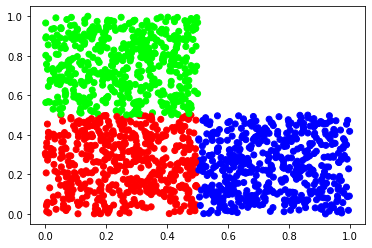

In [9]:
X = np.zeros((1500, 2))
Y = np.zeros((1500, 3))

for i in range(1500):
    if i % 3 == 0:
        X[i, :] = [random.uniform(0, 0.5), random.uniform(0, 0.5)]
    elif i % 3 == 1:
        X[i, :] = [random.uniform(0, 0.5), random.uniform(0.5, 1)]
    else:
        X[i, :] = [random.uniform(0.5, 1), random.uniform(0, 0.5)]
    Y[i, i % 3] = 1

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

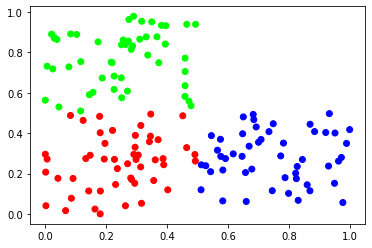

In [10]:
split = int(X.shape[0] * 0.9)

train_X, valid_X = X[:split, :], X[split:, :]
train_Y, valid_Y = Y[:split, :], Y[split:, :]

plt.scatter(valid_X[:, 0], valid_X[:, 1], c=valid_Y)
plt.show()

In [ ]:
from keras import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU

input_params = train_X.shape[1]

model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, )))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(3))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience = 80)

model.fit(train_X, train_Y, epochs=10000,
          batch_size = 500,
          validation_data=(valid_X, valid_Y),
          callbacks=[es],
          )

In [ ]:
step = 0.005
test_X = np.array([[i*step, j*step] for j in range(int(1/step)) for i in range(int(1/step))])

In [ ]:
test_X.shape

In [ ]:
#test_X

In [ ]:
#plt.scatter(test_X[:, 0], test_X[:, 1])

In [ ]:
pred_Y = model.predict(test_X)
plt.scatter(test_X[:, 0], test_X[:, 1], c=pred_Y, s=1, marker="s")

In [ ]:
X = np.zeros((1500, 2))
Y = np.zeros((1500, 3))

for i in range(1500):
    if i % 3 == 0:
        X[i, :] = [0.3 + 0.125*np.random.randn(), 0.3 + 0.125*np.random.randn()]
    elif i % 3 == 1:
        X[i, :] = [0.45 + 0.125*np.random.randn(), 0.6 + 0.125*np.random.randn()]
    else:
        X[i, :] = [0.6 + 0.125*np.random.randn(), 0.3 + 0.125*np.random.randn()]
    Y[i, i % 3] = 1

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [ ]:
split = int(X.shape[0] * 0.9)

train_X, valid_X = X[:split, :], X[split:, :]
train_Y, valid_Y = Y[:split, :], Y[split:, :]

plt.scatter(valid_X[:, 0], valid_X[:, 1], c=valid_Y)
plt.show()

In [ ]:
input_params = train_X.shape[1]

model = Sequential()
model.add(Dense(input_params, input_shape=(input_params, )))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(3))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience = 80)

model.fit(train_X, train_Y, epochs=10000,
          batch_size = 500,
          validation_data=(valid_X, valid_Y),
          callbacks=[es],
          )

In [ ]:
pred_Y = model.predict(test_X)
plt.scatter(test_X[:, 0], test_X[:, 1], c=pred_Y, s=1, marker="s")

In [ ]:
pred_Y = model.predict(test_X)
plt.scatter(test_X[:, 0], test_X[:, 1], c=np.rint(pred_Y), s=1, marker="s")